# Linear Model Selection and Regularization

In [1]:

library(ISLR)
names(Hitters)
dim(Hitters)
sum(is.na(Hitters))
summary(Hitters)

Warning message:
"package 'ISLR' was built under R version 3.4.2"

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 59

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

In [2]:
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))
summary(Hitters)

[1] 263  20

[1] 0

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

In [3]:
# glmnet pakage for ridge and lasso
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.4.2"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.2"Loaded glmnet 2.0-13



In [4]:
x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary

In [12]:
#Rideg regression
# grid of values ranging from λ = 10^10 to λ = 10^−2
grid=10^seq(10,-2,length=100)
# alpha=0 -> ridge regression model , alpha=1 -> lasso model
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)
#default is ridge regression in glmnet function, standardised variables is also default
dim(coef(ridge.mod))


[1]  20 100

In [13]:
names(ridge.mod)
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef( ridge.mod )[-1,50]^2))


[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

In [16]:
ridge.mod$lambda [60]
coef(ridge.mod)[ ,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

In [17]:
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [18]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2)
test=-train
y.test=y[test]

In [29]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod, s=4, newx=x[test,])
mean((ridge.pred-y.test)^2) #MSE
mean((mean(y[train])-y.test)^2)
ridge.pred= predict(ridge.mod ,s=1e10 , newx=x[test,]) #taking very large value of lambda
mean((ridge.pred-y.test)^2)
#  least squares is simply ridge regression with λ = 0.
ridge.pred= predict(ridge.mod ,s=0 , newx=x[test,]) #taking very large value of lambda
mean((ridge.pred-y.test)^2)
library(ISLR)
library (MASS)
lm(y∼x, subset=train )
predict(ridge.mod,s=0, exact=T, type ="coefficients")[1:20,]

[1] 101036.8

[1] 193253.1

[1] 193253.1

[1] 114723.6


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


ERROR: Error: used coef.glmnet() or predict.glmnet() with `exact=TRUE` so must in addition supply original argument(s)  x and y  in order to safely rerun glmnet


[1] 211.7416

[1] 96015.51

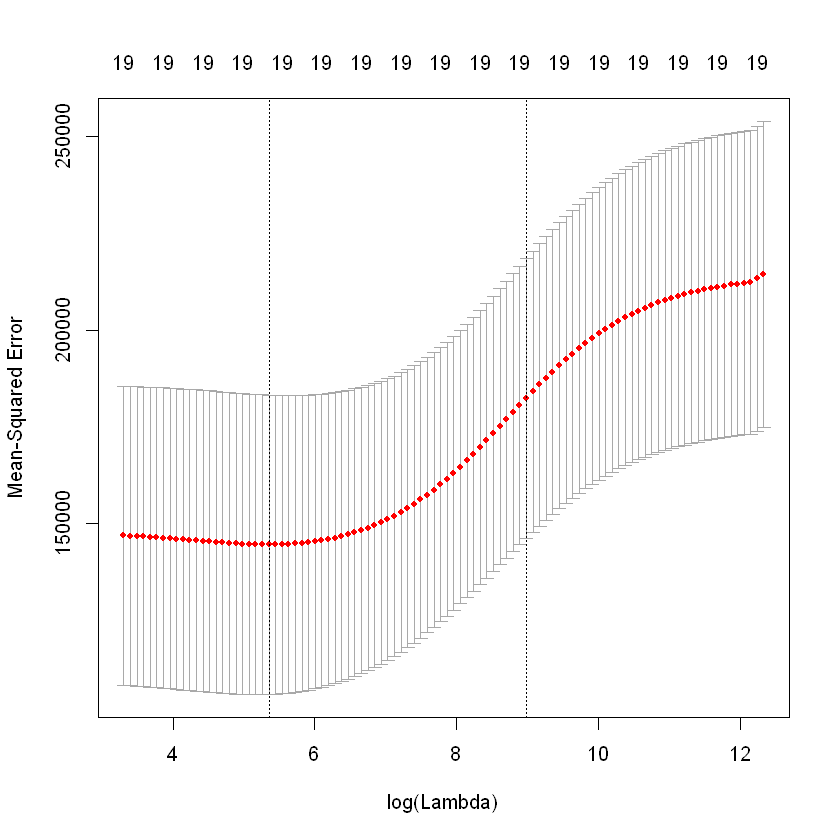

In [32]:
set.seed (1)
cv.out =cv.glmnet(x[train ,], y[train ], alpha =0)
plot(cv.out )
bestlam =cv.out$lambda.min
bestlam
ridge.pred= predict (ridge.mod ,s=bestlam , newx=x[test ,])
mean((ridge.pred-y.test)^2)

In [35]:
# refit our ridge regression model on the full data set,
# using the value of λ chosen by cross-validation, 
out=glmnet(x,y, alpha =0)
predict(out,type ="coefficients",s= bestlam )[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

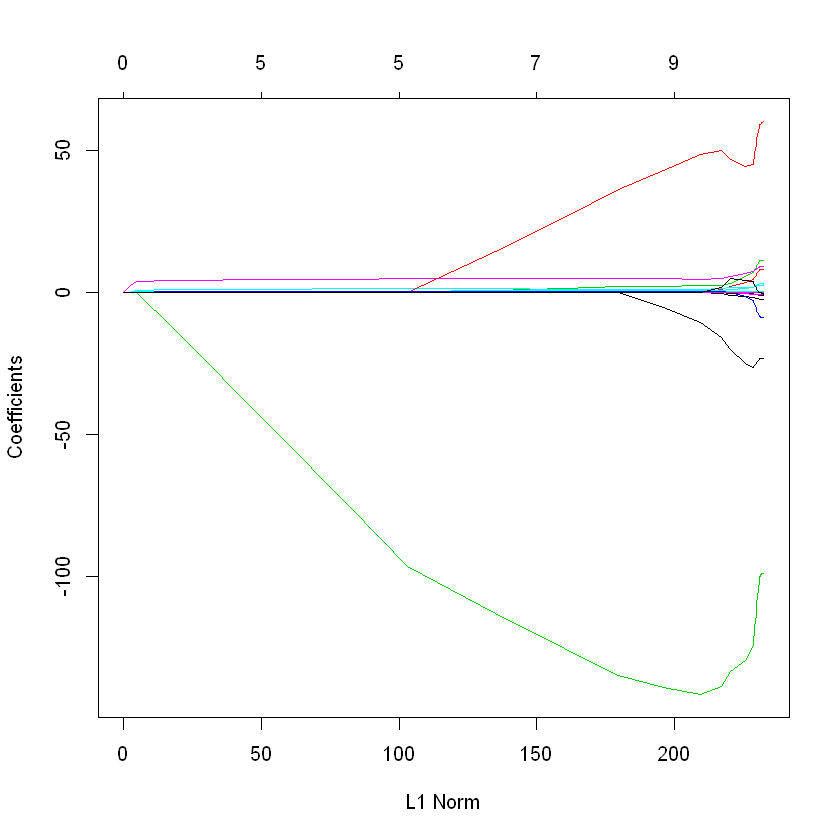

[1] 16.78016

[1] 100743.4

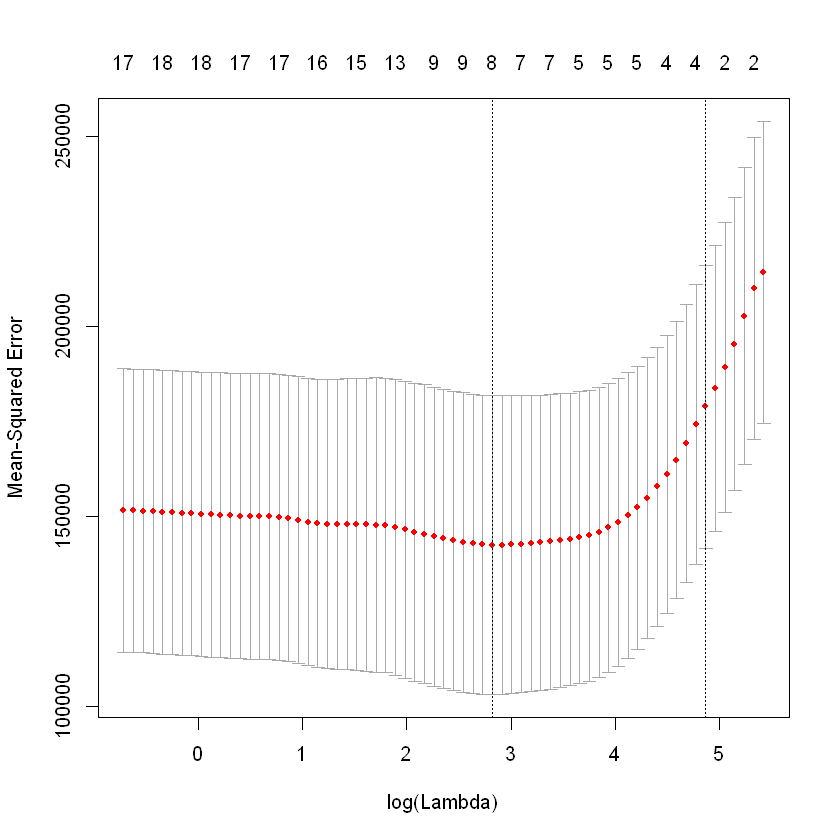

In [37]:
#Lasso
lasso.mod=glmnet(x[train,], y[train],alpha=1, lambda=grid)
plot(lasso.mod) #coefficient plot
# cross-validation and compute the associated test error.
set.seed (1)
cv.out =cv.glmnet(x[train ,], y[train ], alpha =1)
plot(cv.out )
bestlam =cv.out$lambda.min
bestlam
lasso.pred= predict (lasso.mod ,s=bestlam , newx=x[test ,])
mean((lasso.pred-y.test)^2)

In [39]:
# refit our lasso regression model on the full data set,
# using the value of λ chosen by cross-validation, 
out=glmnet(x,y, alpha =1,lambda=grid)
lasso.coef=predict(out,type ="coefficients",s= bestlam )[1:20,]
lasso.coef
lasso.coef[lasso.coef!=0]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

(Intercept)         Hits        Walks        CRuns         CRBI      LeagueN 
  18.5394844    1.8735390    2.2178444    0.2071252    0.4130132    3.2666677 
   DivisionW      PutOuts 
-103.4845458    0.2204284